In [141]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import datetime
import numpy as np

# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

### CoffeeCappTransByPlatformInstantKpis

In [143]:

query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,1,2022-11-30 13:45:00,1,BiTX-OD,387,327
1,2,2022-11-30 13:45:00,2,MobilePay,684,578
2,3,2022-11-30 13:45:00,3,MobilePayStage,0,0
3,4,2022-11-30 13:45:00,4,MobilePaySpain,0,0
4,5,2022-11-30 13:45:00,5,MobilePayFrance,0,0
...,...,...,...,...,...,...
670802,690788,2023-10-03 11:15:00,4,MobilePaySpain,0,0
670803,690789,2023-10-03 11:15:00,5,MobilePayFrance,0,0
670804,690790,2023-10-03 11:15:00,6,MobilePay-CPI,144,136
670805,690791,2023-10-03 11:15:00,7,Coges,247,219


In [144]:
query = """
SELECT  [PlatformName]
        ,SUM([TotalTransactionsCounter]) AS TotalTransactionsCounter
        ,SUM([CompletedTransactionsCounter]) AS CompletedTransactionsCounter
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE CompletedTransactionsCounter != 0
GROUP BY PlatformName
ORDER BY TotalTransactionsCounter DESC
"""

df_CoffeeCappTransByPlatformGroup = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformGroup

,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,MobilePay,30619836,23447353
1,BiTX-OD,15388710,13591128
2,Coges,5466878,4274715
3,MobilePay-CPI,5289052,4226577
4,Pickio,778,678


<Axes: xlabel='PlatformName'>

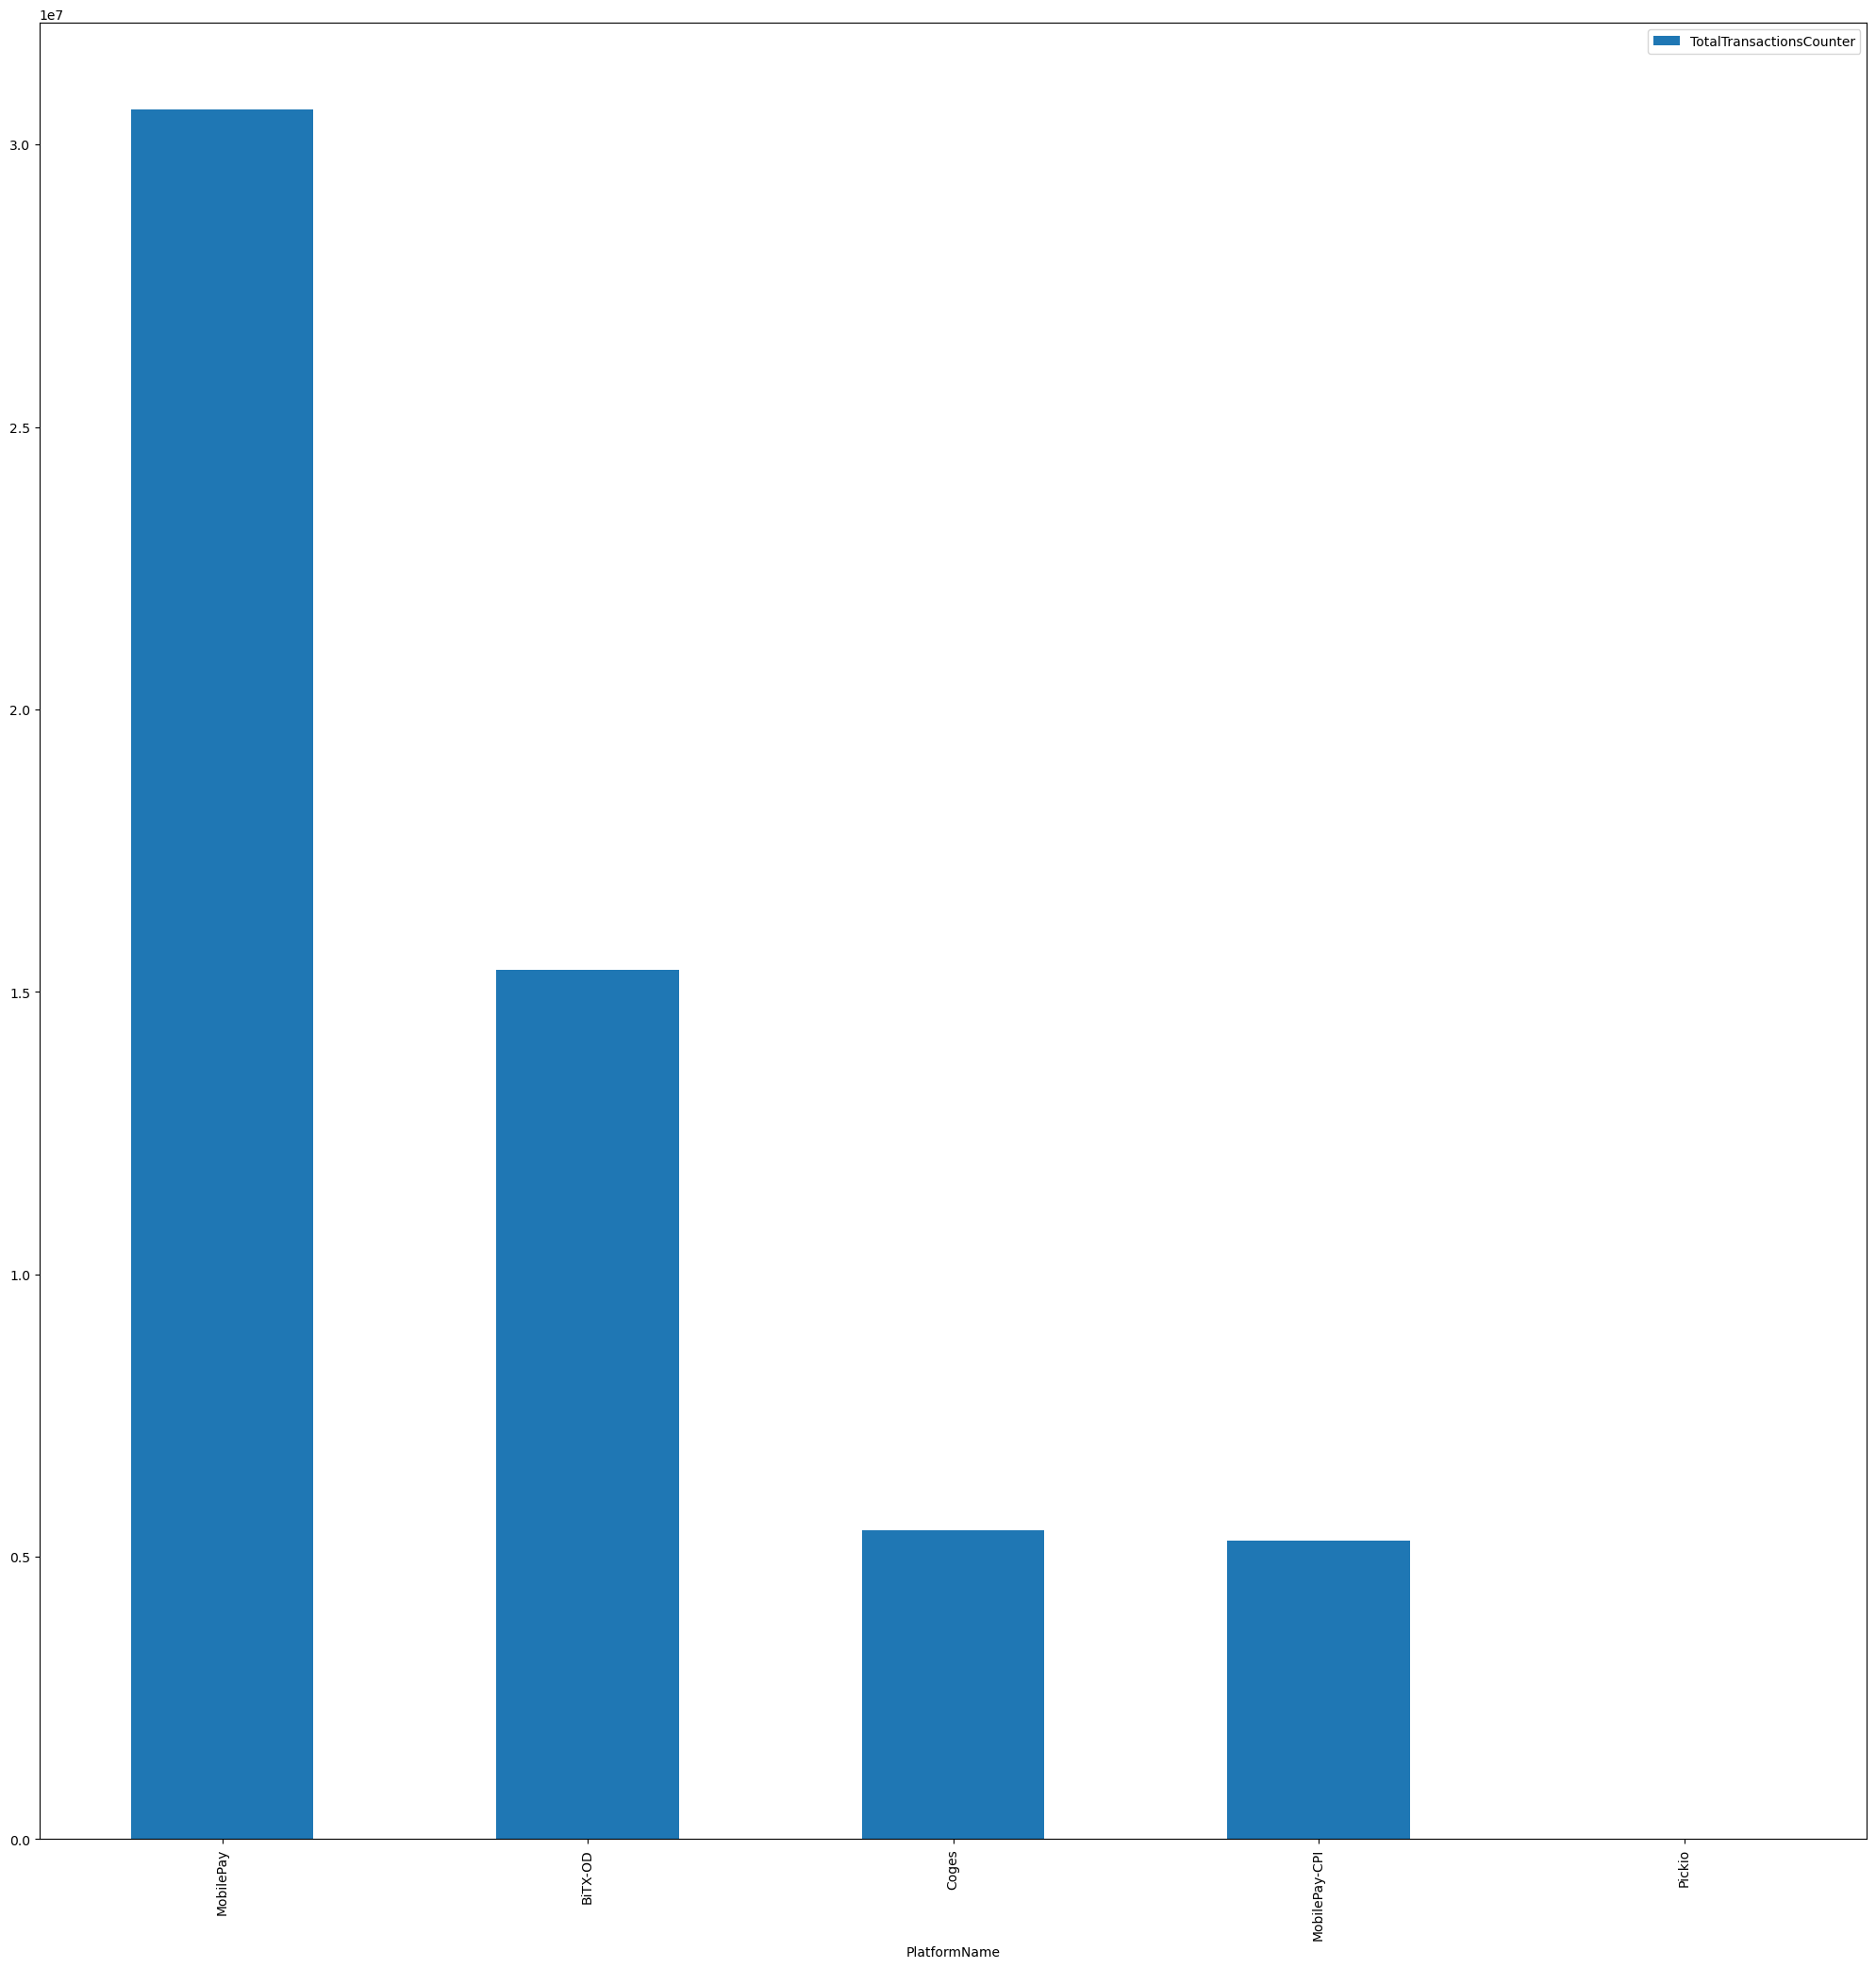

In [145]:
df_CoffeeCappTransByPlatformGroup.plot(
  kind="bar",
  x="PlatformName",     
  y="TotalTransactionsCounter",
  figsize=(25, 25)
  )

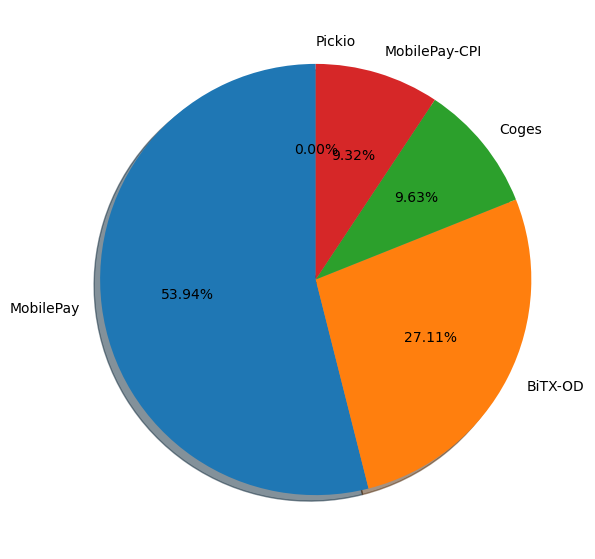

In [146]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_CoffeeCappTransByPlatformGroup['TotalTransactionsCounter'], labels = df_CoffeeCappTransByPlatformGroup['PlatformName'], startangle=90, shadow=True, autopct='%1.2f%%')
# show plot
plt.show()

<Axes: xlabel='PlatformName'>

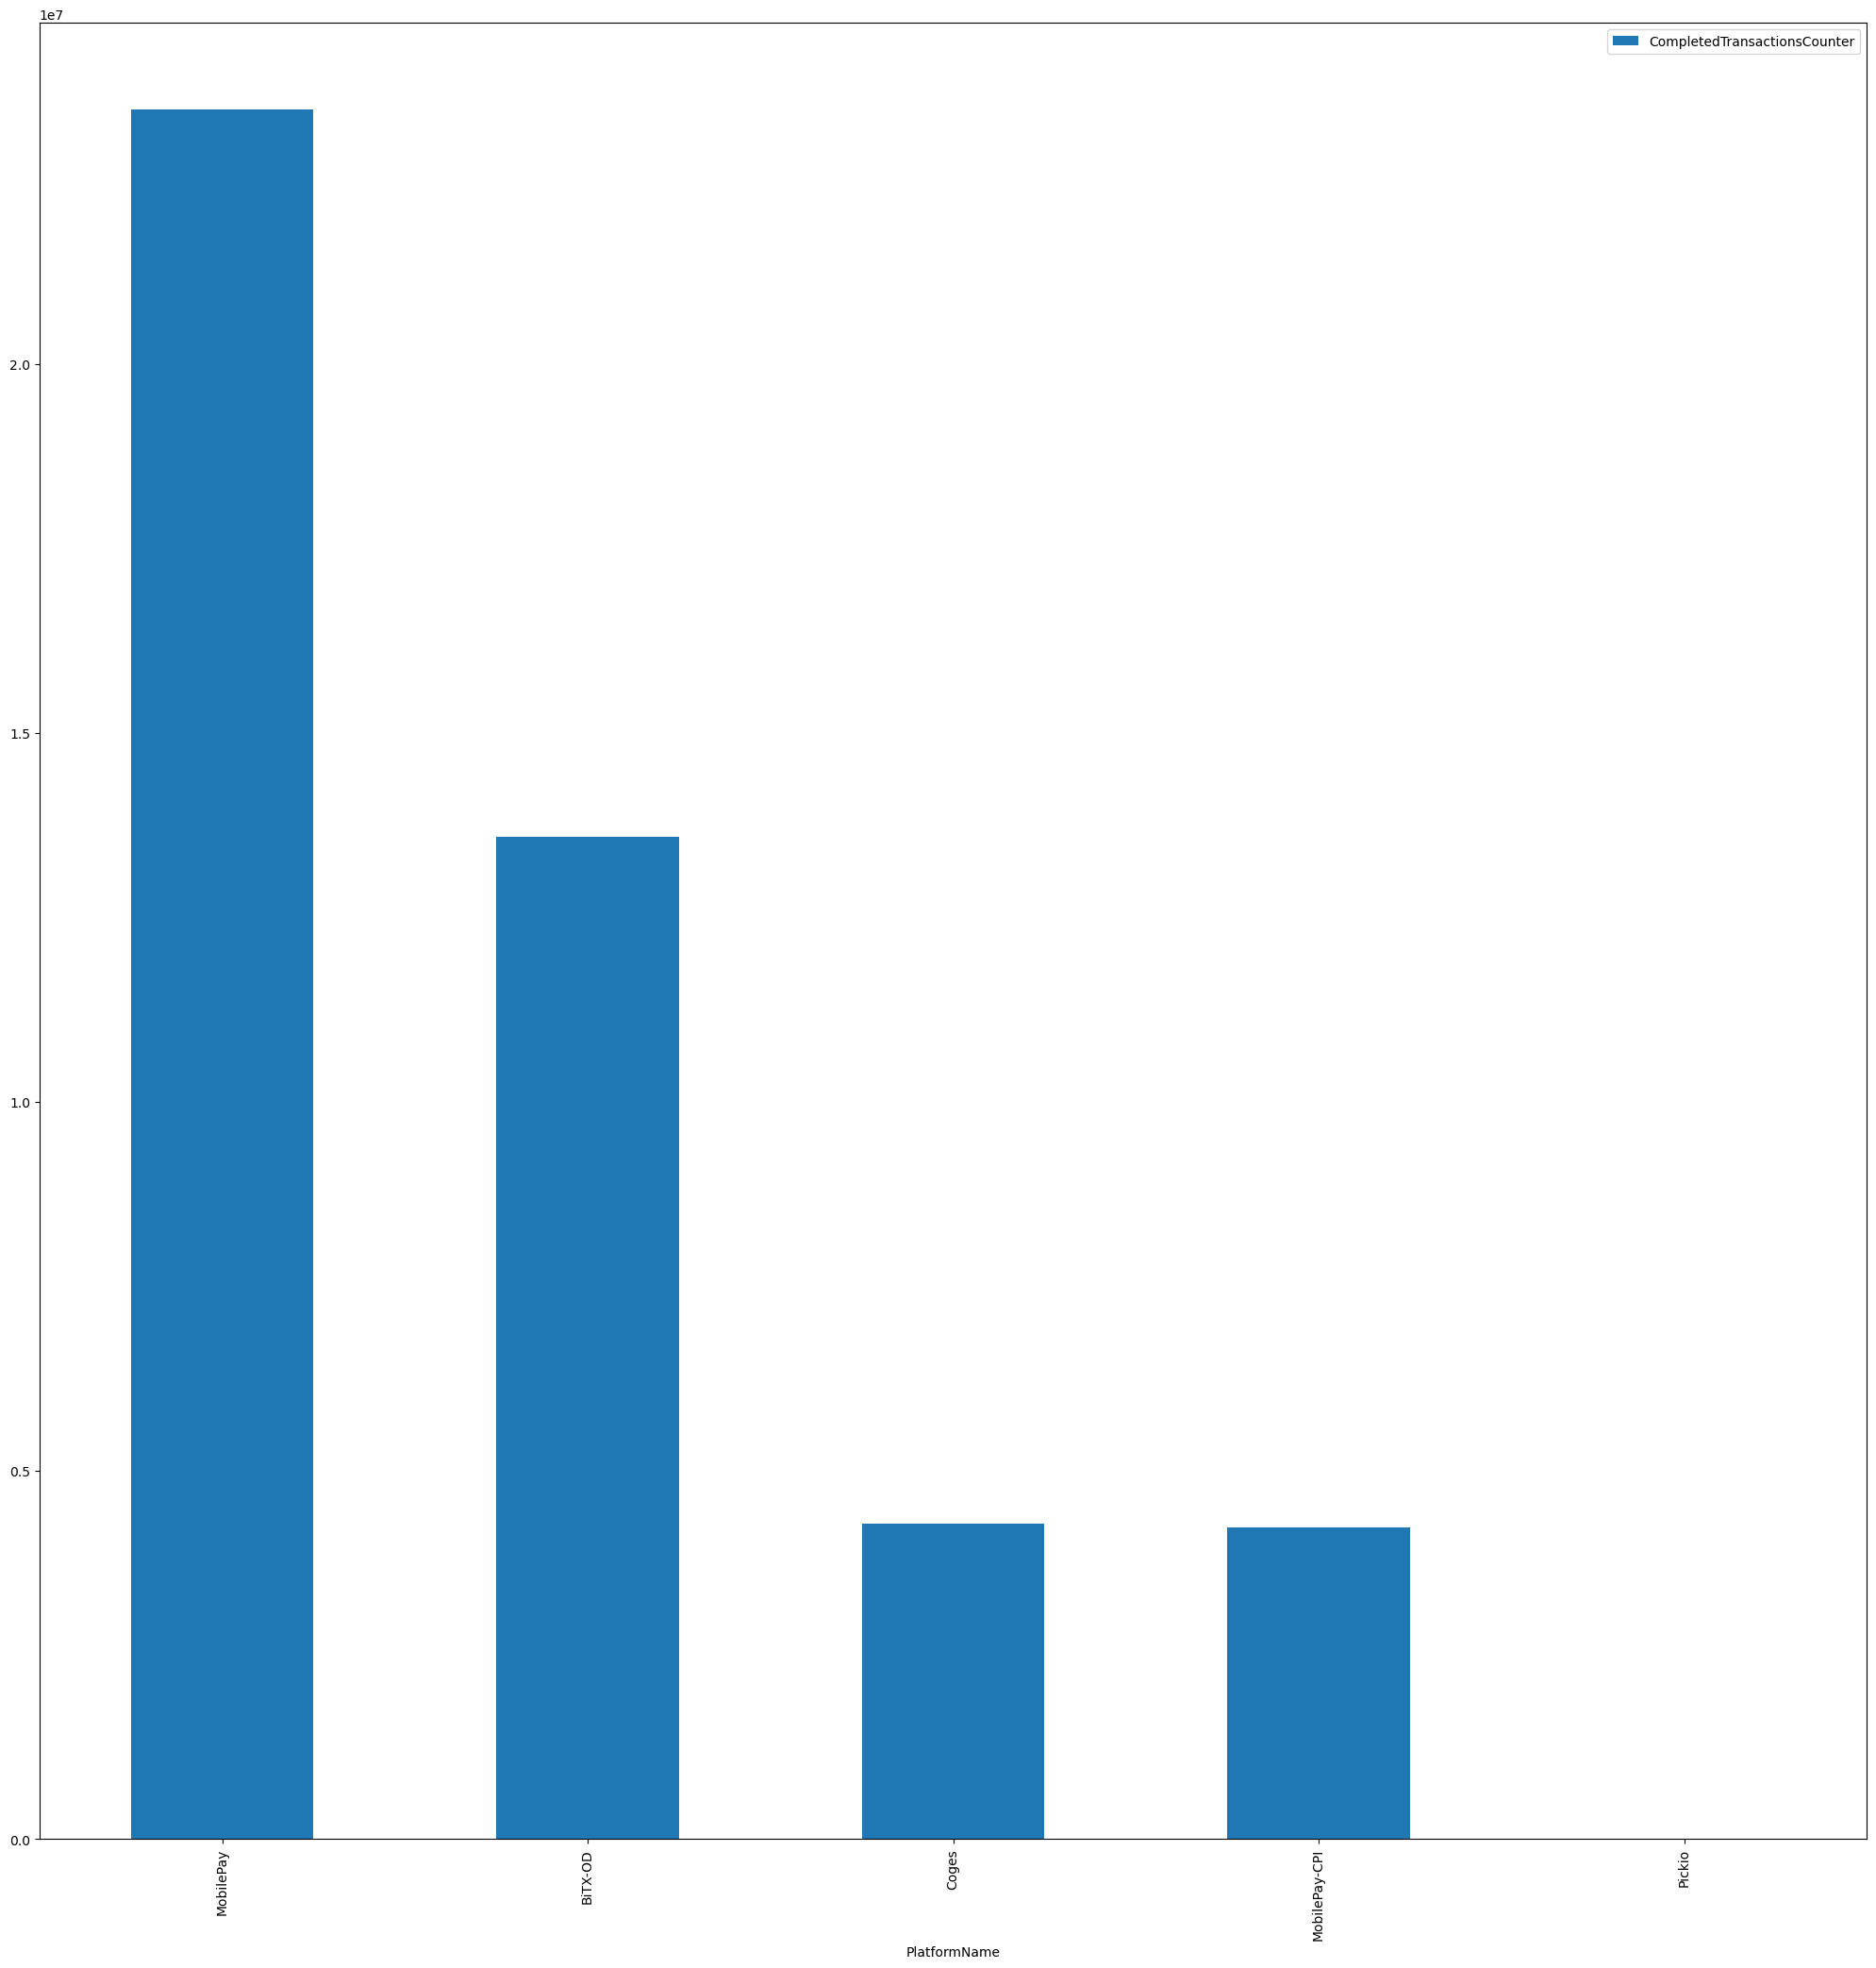

In [147]:
df_CoffeeCappTransByPlatformGroup.plot(
  kind="bar",
  x="PlatformName",     
  y="CompletedTransactionsCounter",
  figsize=(25, 25)
  )

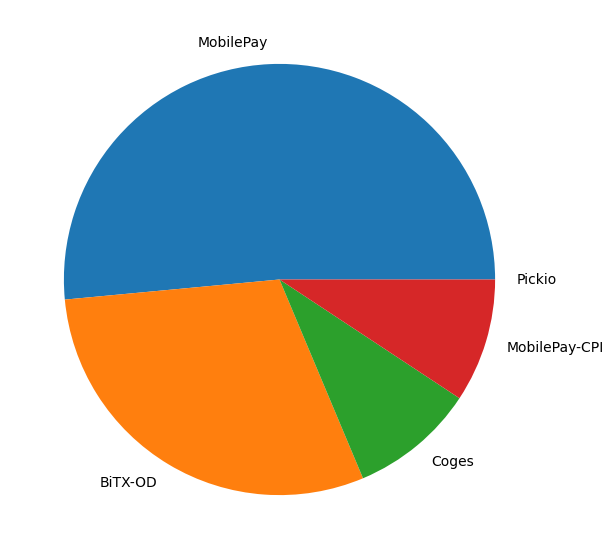

In [148]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_CoffeeCappTransByPlatformGroup['CompletedTransactionsCounter'], labels = df_CoffeeCappTransByPlatformGroup['PlatformName'])
 
# show plot
plt.show()

## Transactions by each Platform 

### BiTX-OD

In [149]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD'
"""

df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,1,2022-11-30 13:45:00,1,BiTX-OD,387,327
1,8,2022-11-30 13:50:00,1,BiTX-OD,416,344
2,15,2022-11-30 13:55:00,1,BiTX-OD,402,346
3,22,2022-11-30 14:00:00,1,BiTX-OD,408,335
4,29,2022-11-30 14:05:00,1,BiTX-OD,455,397
...,...,...,...,...,...,...
88382,690753,2023-10-03 10:55:00,1,BiTX-OD,506,451
88383,690761,2023-10-03 11:00:00,1,BiTX-OD,516,474
88384,690769,2023-10-03 11:05:00,1,BiTX-OD,520,466
88385,690777,2023-10-03 11:10:00,1,BiTX-OD,548,514


## Transactions by BiTX-OD in last month

In [150]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD' AND Month(ReferenceDate)=09 and year(referencedate)= 2023
"""

df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,608857,2023-09-02 05:55:00,1,BiTX-OD,111,100
1,608865,2023-09-02 06:00:00,1,BiTX-OD,123,117
2,608873,2023-09-02 06:05:00,1,BiTX-OD,164,137
3,608881,2023-09-02 06:10:00,1,BiTX-OD,119,105
4,608889,2023-09-02 06:15:00,1,BiTX-OD,151,132
...,...,...,...,...,...,...
8635,662609,2023-09-21 05:45:00,1,BiTX-OD,485,432
8636,662617,2023-09-21 05:50:00,1,BiTX-OD,517,486
8637,662625,2023-09-21 05:55:00,1,BiTX-OD,611,562
8638,662633,2023-09-21 06:00:00,1,BiTX-OD,565,540


In [151]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684129,2023-09-30 13:55:00,1,BiTX-OD,69,69
1,684137,2023-09-30 14:00:00,1,BiTX-OD,72,61
2,684145,2023-09-30 14:05:00,1,BiTX-OD,76,66
3,684153,2023-09-30 14:10:00,1,BiTX-OD,56,54
4,684161,2023-09-30 14:15:00,1,BiTX-OD,69,62
...,...,...,...,...,...,...
283,684089,2023-09-30 13:30:00,1,BiTX-OD,64,60
284,684097,2023-09-30 13:35:00,1,BiTX-OD,73,62
285,684105,2023-09-30 13:40:00,1,BiTX-OD,52,48
286,684113,2023-09-30 13:45:00,1,BiTX-OD,73,62


Text(0, 0.5, 'TotalTransactionsCounter')

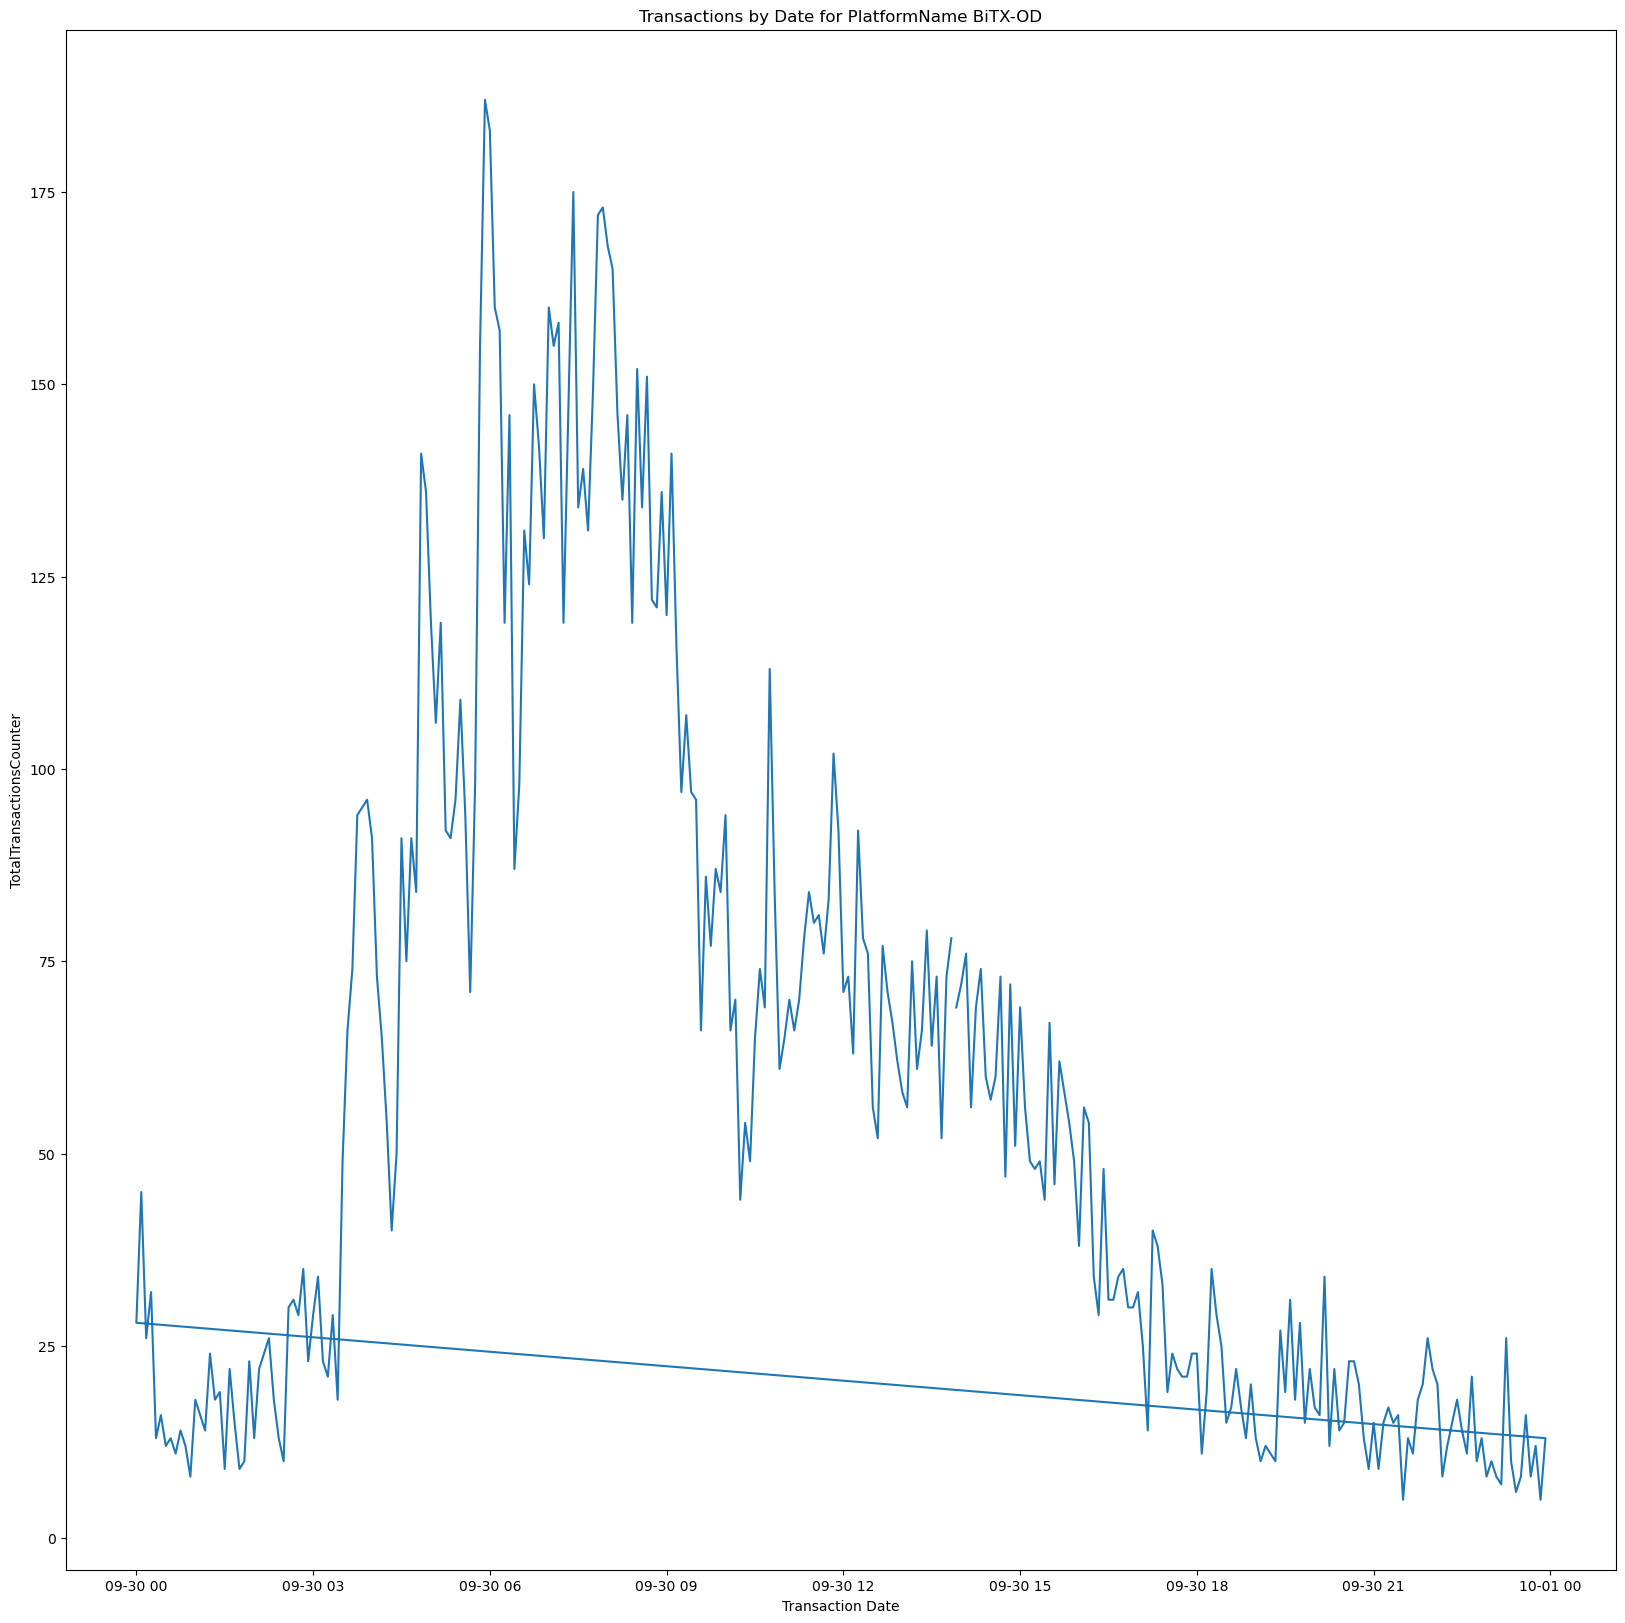

In [152]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatformBitx['ReferenceDate'], df_CoffeeCappTransByPlatformBitx['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName BiTX-OD')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [153]:
query = """
SELECT  day(ReferenceDate) as day
        ,[EK_PlatformId]
        ,[PlatformName]
        ,sum([TotalTransactionsCounter])
        ,sum([CompletedTransactionsCounter])
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
GROUP BY day(ReferenceDate), [EK_PlatformId], [PlatformName]
"""
df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,day,EK_PlatformId,PlatformName,,
0,30,1,BiTX-OD,16740,15173


### MobilepayStage

In [154]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayStage'
"""

df_CoffeeCappTransByPlatformMobile = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformMobile

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,3,2022-11-30 13:45:00,3,MobilePayStage,0,0
1,10,2022-11-30 13:50:00,3,MobilePayStage,0,0
2,17,2022-11-30 13:55:00,3,MobilePayStage,0,0
3,24,2022-11-30 14:00:00,3,MobilePayStage,3,0
4,31,2022-11-30 14:05:00,3,MobilePayStage,1,0
...,...,...,...,...,...,...
88382,690755,2023-10-03 10:55:00,3,MobilePayStage,0,0
88383,690763,2023-10-03 11:00:00,3,MobilePayStage,0,0
88384,690771,2023-10-03 11:05:00,3,MobilePayStage,0,0
88385,690779,2023-10-03 11:10:00,3,MobilePayStage,0,0


In [155]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayStage' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatformMobile = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformMobile

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684131,2023-09-30 13:55:00,3,MobilePayStage,0,0
1,684139,2023-09-30 14:00:00,3,MobilePayStage,0,0
2,684147,2023-09-30 14:05:00,3,MobilePayStage,0,0
3,684155,2023-09-30 14:10:00,3,MobilePayStage,0,0
4,684163,2023-09-30 14:15:00,3,MobilePayStage,0,0
...,...,...,...,...,...,...
283,684091,2023-09-30 13:30:00,3,MobilePayStage,0,0
284,684099,2023-09-30 13:35:00,3,MobilePayStage,0,0
285,684107,2023-09-30 13:40:00,3,MobilePayStage,0,0
286,684115,2023-09-30 13:45:00,3,MobilePayStage,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

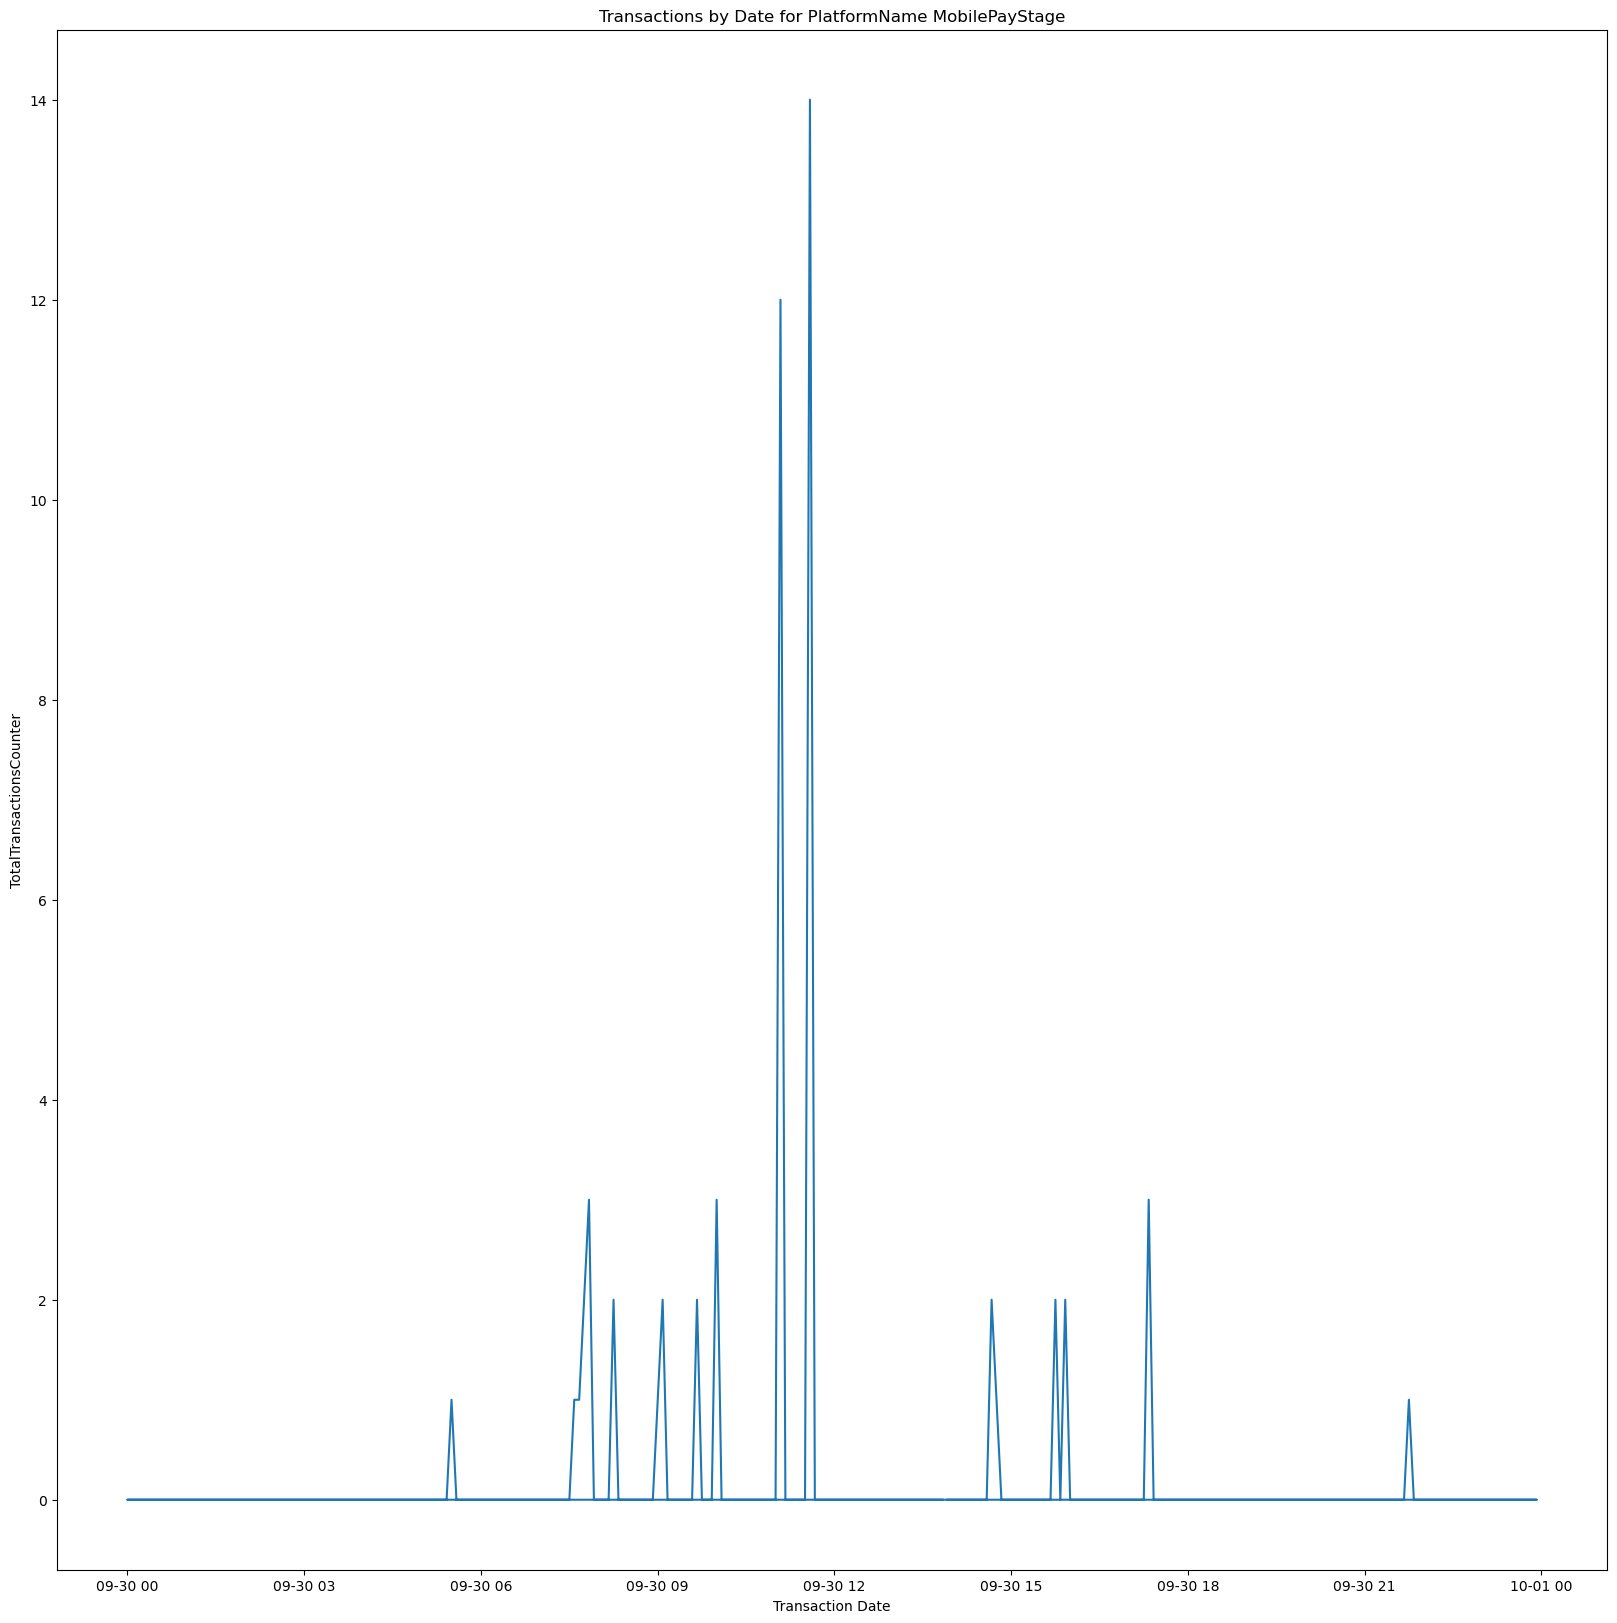

In [156]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatformMobile['ReferenceDate'], df_CoffeeCappTransByPlatformMobile['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePayStage')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [157]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform 

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,2,2022-11-30 13:45:00,2,MobilePay,684,578
1,9,2022-11-30 13:50:00,2,MobilePay,795,604
2,16,2022-11-30 13:55:00,2,MobilePay,763,627
3,23,2022-11-30 14:00:00,2,MobilePay,832,625
4,30,2022-11-30 14:05:00,2,MobilePay,787,588
...,...,...,...,...,...,...
88382,690754,2023-10-03 10:55:00,2,MobilePay,783,647
88383,690762,2023-10-03 11:00:00,2,MobilePay,1023,854
88384,690770,2023-10-03 11:05:00,2,MobilePay,968,808
88385,690778,2023-10-03 11:10:00,2,MobilePay,916,808


In [158]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684130,2023-09-30 13:55:00,2,MobilePay,203,159
1,684138,2023-09-30 14:00:00,2,MobilePay,216,175
2,684146,2023-09-30 14:05:00,2,MobilePay,208,187
3,684154,2023-09-30 14:10:00,2,MobilePay,190,147
4,684162,2023-09-30 14:15:00,2,MobilePay,184,146
...,...,...,...,...,...,...
283,684090,2023-09-30 13:30:00,2,MobilePay,210,167
284,684098,2023-09-30 13:35:00,2,MobilePay,199,156
285,684106,2023-09-30 13:40:00,2,MobilePay,196,162
286,684114,2023-09-30 13:45:00,2,MobilePay,167,137


Text(0, 0.5, 'TotalTransactionsCounter')

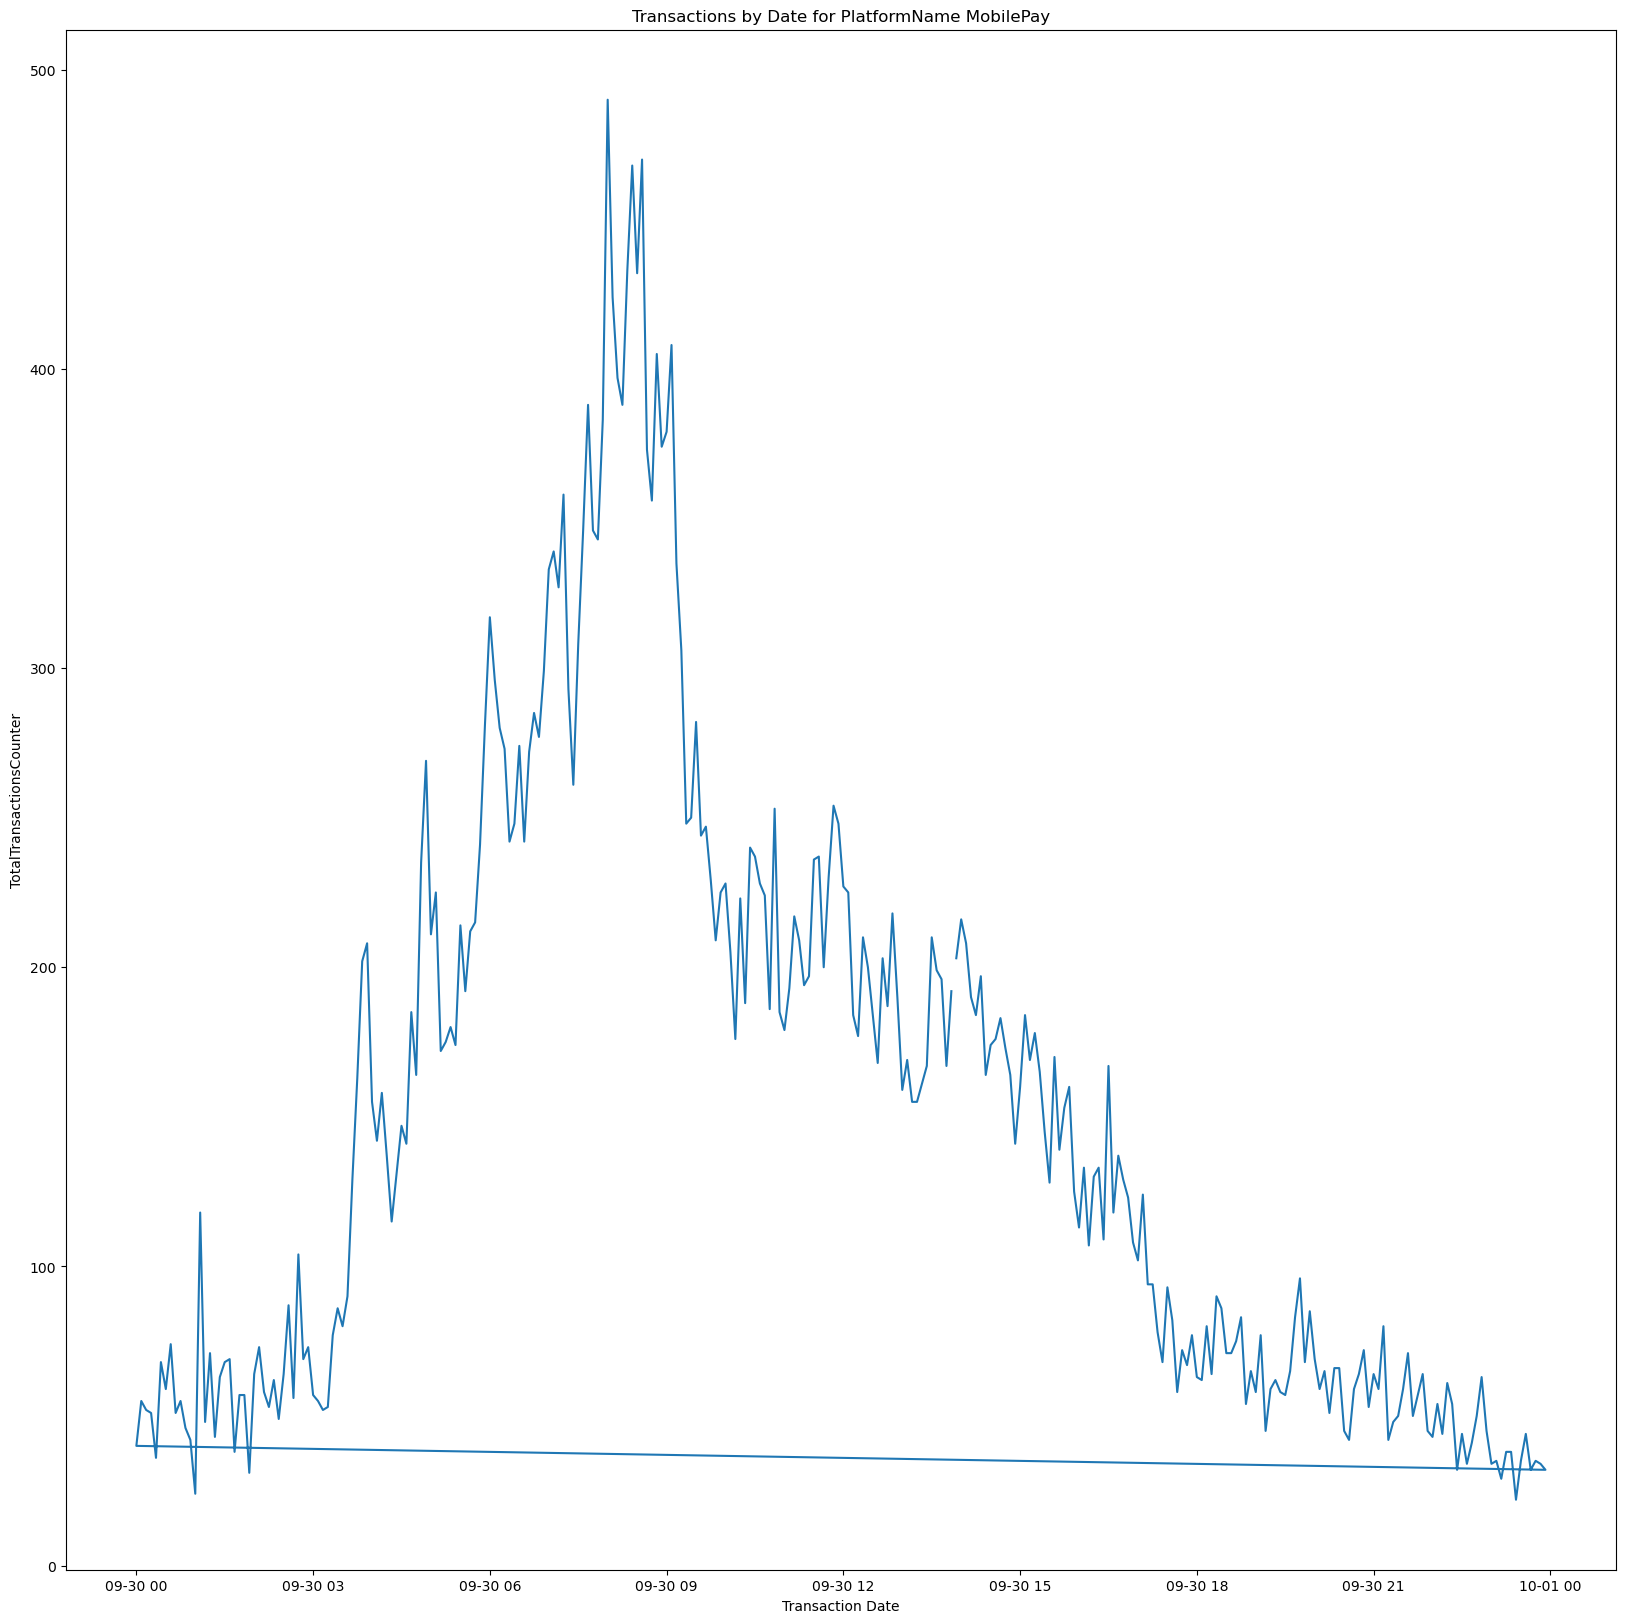

In [159]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePay')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [160]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePaySpain'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,4,2022-11-30 13:45:00,4,MobilePaySpain,0,0
1,11,2022-11-30 13:50:00,4,MobilePaySpain,0,0
2,18,2022-11-30 13:55:00,4,MobilePaySpain,0,0
3,25,2022-11-30 14:00:00,4,MobilePaySpain,0,0
4,32,2022-11-30 14:05:00,4,MobilePaySpain,0,0
...,...,...,...,...,...,...
88382,690756,2023-10-03 10:55:00,4,MobilePaySpain,0,0
88383,690764,2023-10-03 11:00:00,4,MobilePaySpain,0,0
88384,690772,2023-10-03 11:05:00,4,MobilePaySpain,0,0
88385,690780,2023-10-03 11:10:00,4,MobilePaySpain,0,0


In [161]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePaySpain' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,608860,2023-09-02 05:55:00,4,MobilePaySpain,0,0
1,608868,2023-09-02 06:00:00,4,MobilePaySpain,0,0
2,608876,2023-09-02 06:05:00,4,MobilePaySpain,0,0
3,608884,2023-09-02 06:10:00,4,MobilePaySpain,0,0
4,608892,2023-09-02 06:15:00,4,MobilePaySpain,0,0
...,...,...,...,...,...,...
8635,647372,2023-09-14 15:00:00,4,MobilePaySpain,0,0
8636,647380,2023-09-14 15:05:00,4,MobilePaySpain,0,0
8637,647388,2023-09-14 15:10:00,4,MobilePaySpain,0,0
8638,647396,2023-09-14 15:15:00,4,MobilePaySpain,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

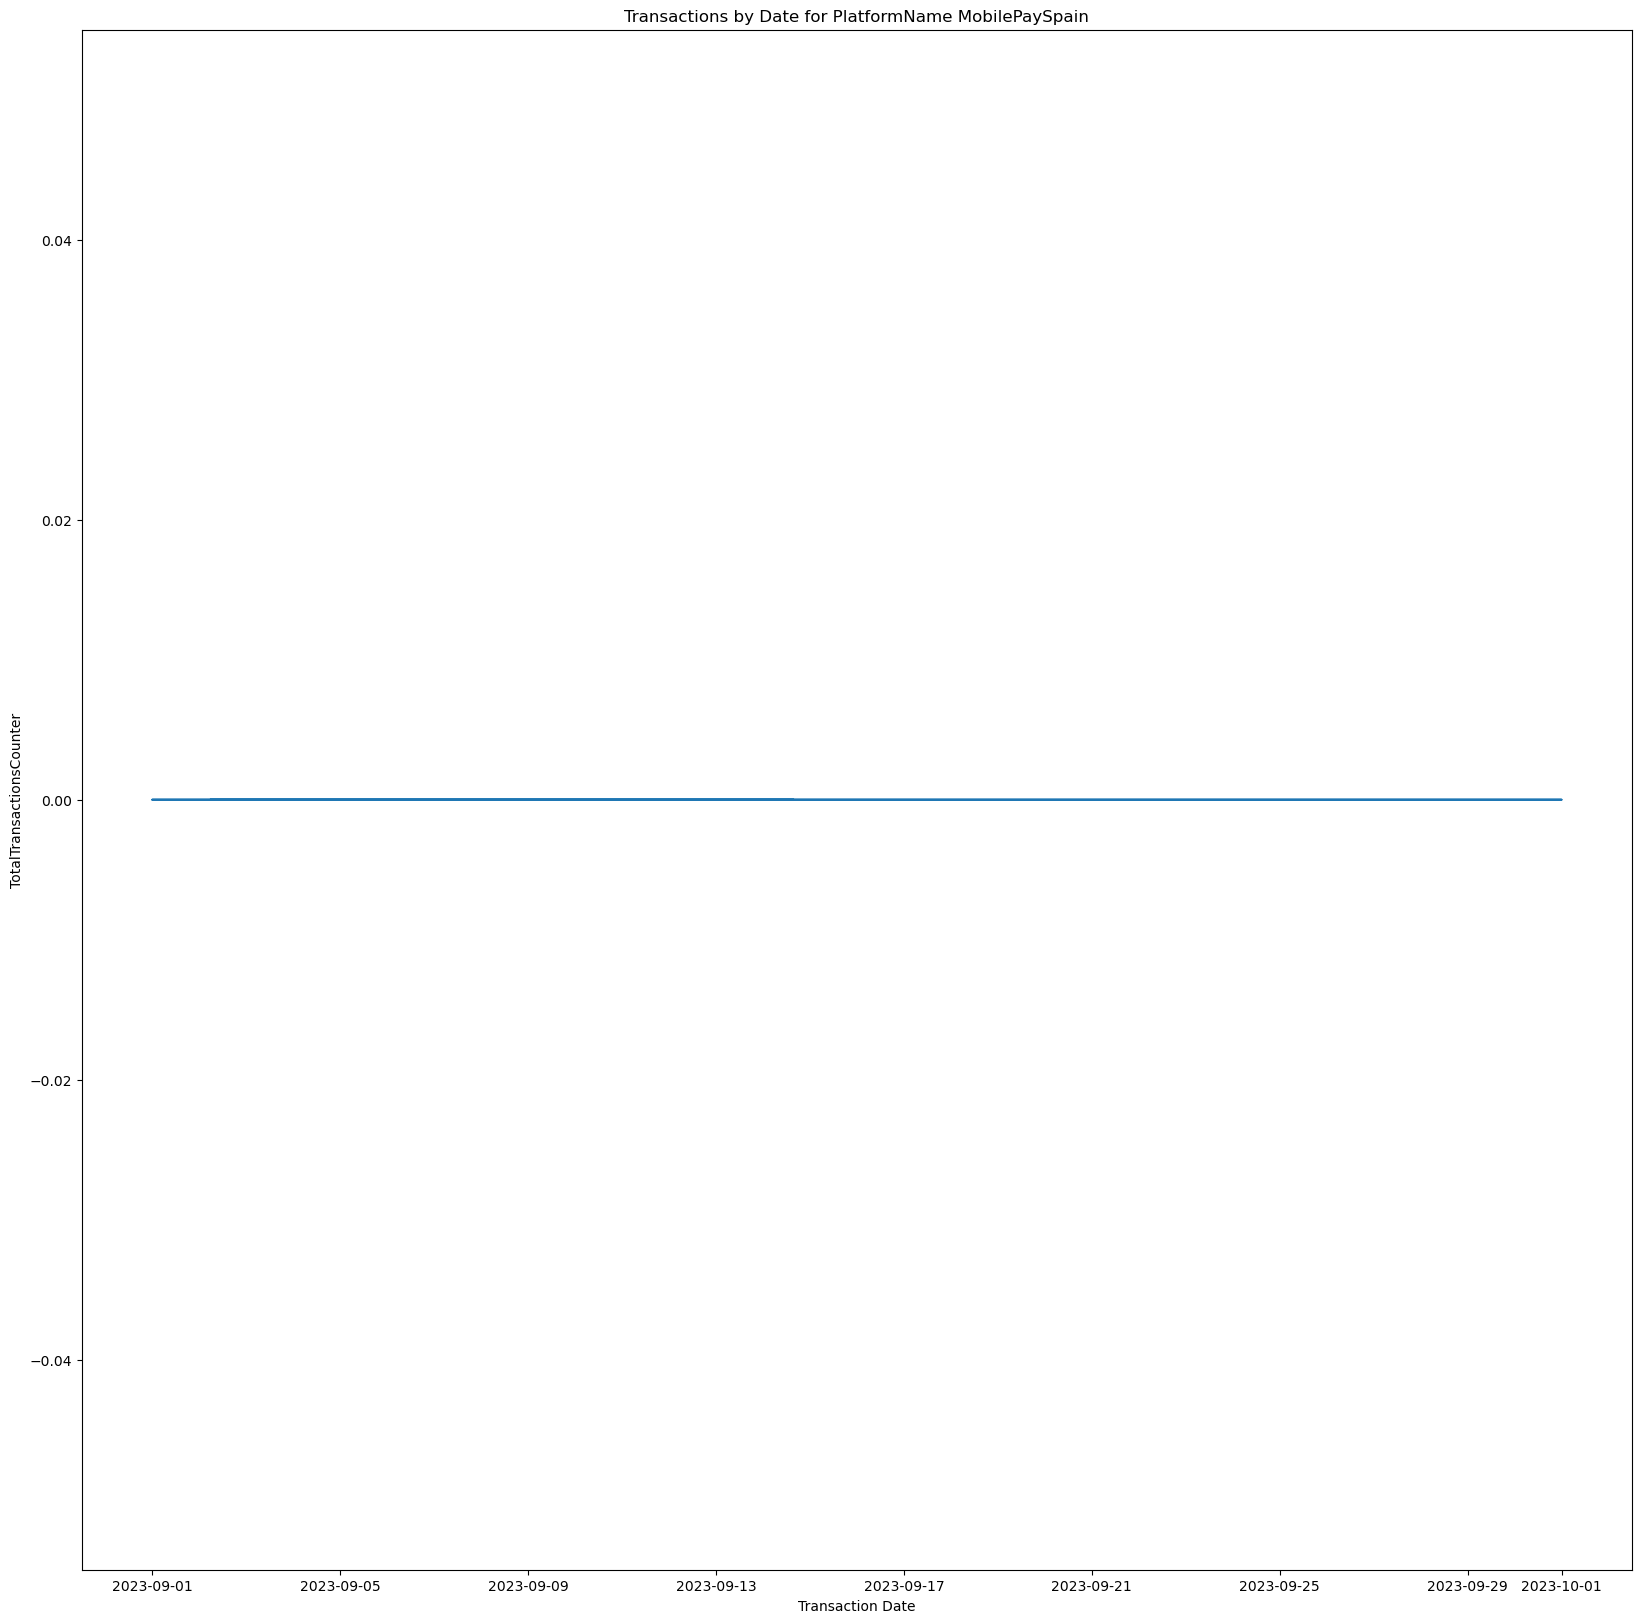

In [162]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePaySpain')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [163]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay-CPI'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,6,2022-11-30 13:45:00,6,MobilePay-CPI,110,97
1,13,2022-11-30 13:50:00,6,MobilePay-CPI,107,86
2,20,2022-11-30 13:55:00,6,MobilePay-CPI,126,93
3,27,2022-11-30 14:00:00,6,MobilePay-CPI,147,113
4,34,2022-11-30 14:05:00,6,MobilePay-CPI,121,94
...,...,...,...,...,...,...
88382,690758,2023-10-03 10:55:00,6,MobilePay-CPI,172,150
88383,690766,2023-10-03 11:00:00,6,MobilePay-CPI,151,134
88384,690774,2023-10-03 11:05:00,6,MobilePay-CPI,152,134
88385,690782,2023-10-03 11:10:00,6,MobilePay-CPI,166,141


In [164]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay-CPI' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684134,2023-09-30 13:55:00,6,MobilePay-CPI,30,28
1,684142,2023-09-30 14:00:00,6,MobilePay-CPI,21,20
2,684150,2023-09-30 14:05:00,6,MobilePay-CPI,16,14
3,684158,2023-09-30 14:10:00,6,MobilePay-CPI,22,19
4,684166,2023-09-30 14:15:00,6,MobilePay-CPI,22,19
...,...,...,...,...,...,...
283,684094,2023-09-30 13:30:00,6,MobilePay-CPI,8,8
284,684102,2023-09-30 13:35:00,6,MobilePay-CPI,20,19
285,684110,2023-09-30 13:40:00,6,MobilePay-CPI,29,22
286,684118,2023-09-30 13:45:00,6,MobilePay-CPI,26,25


Text(0, 0.5, 'TotalTransactionsCounter')

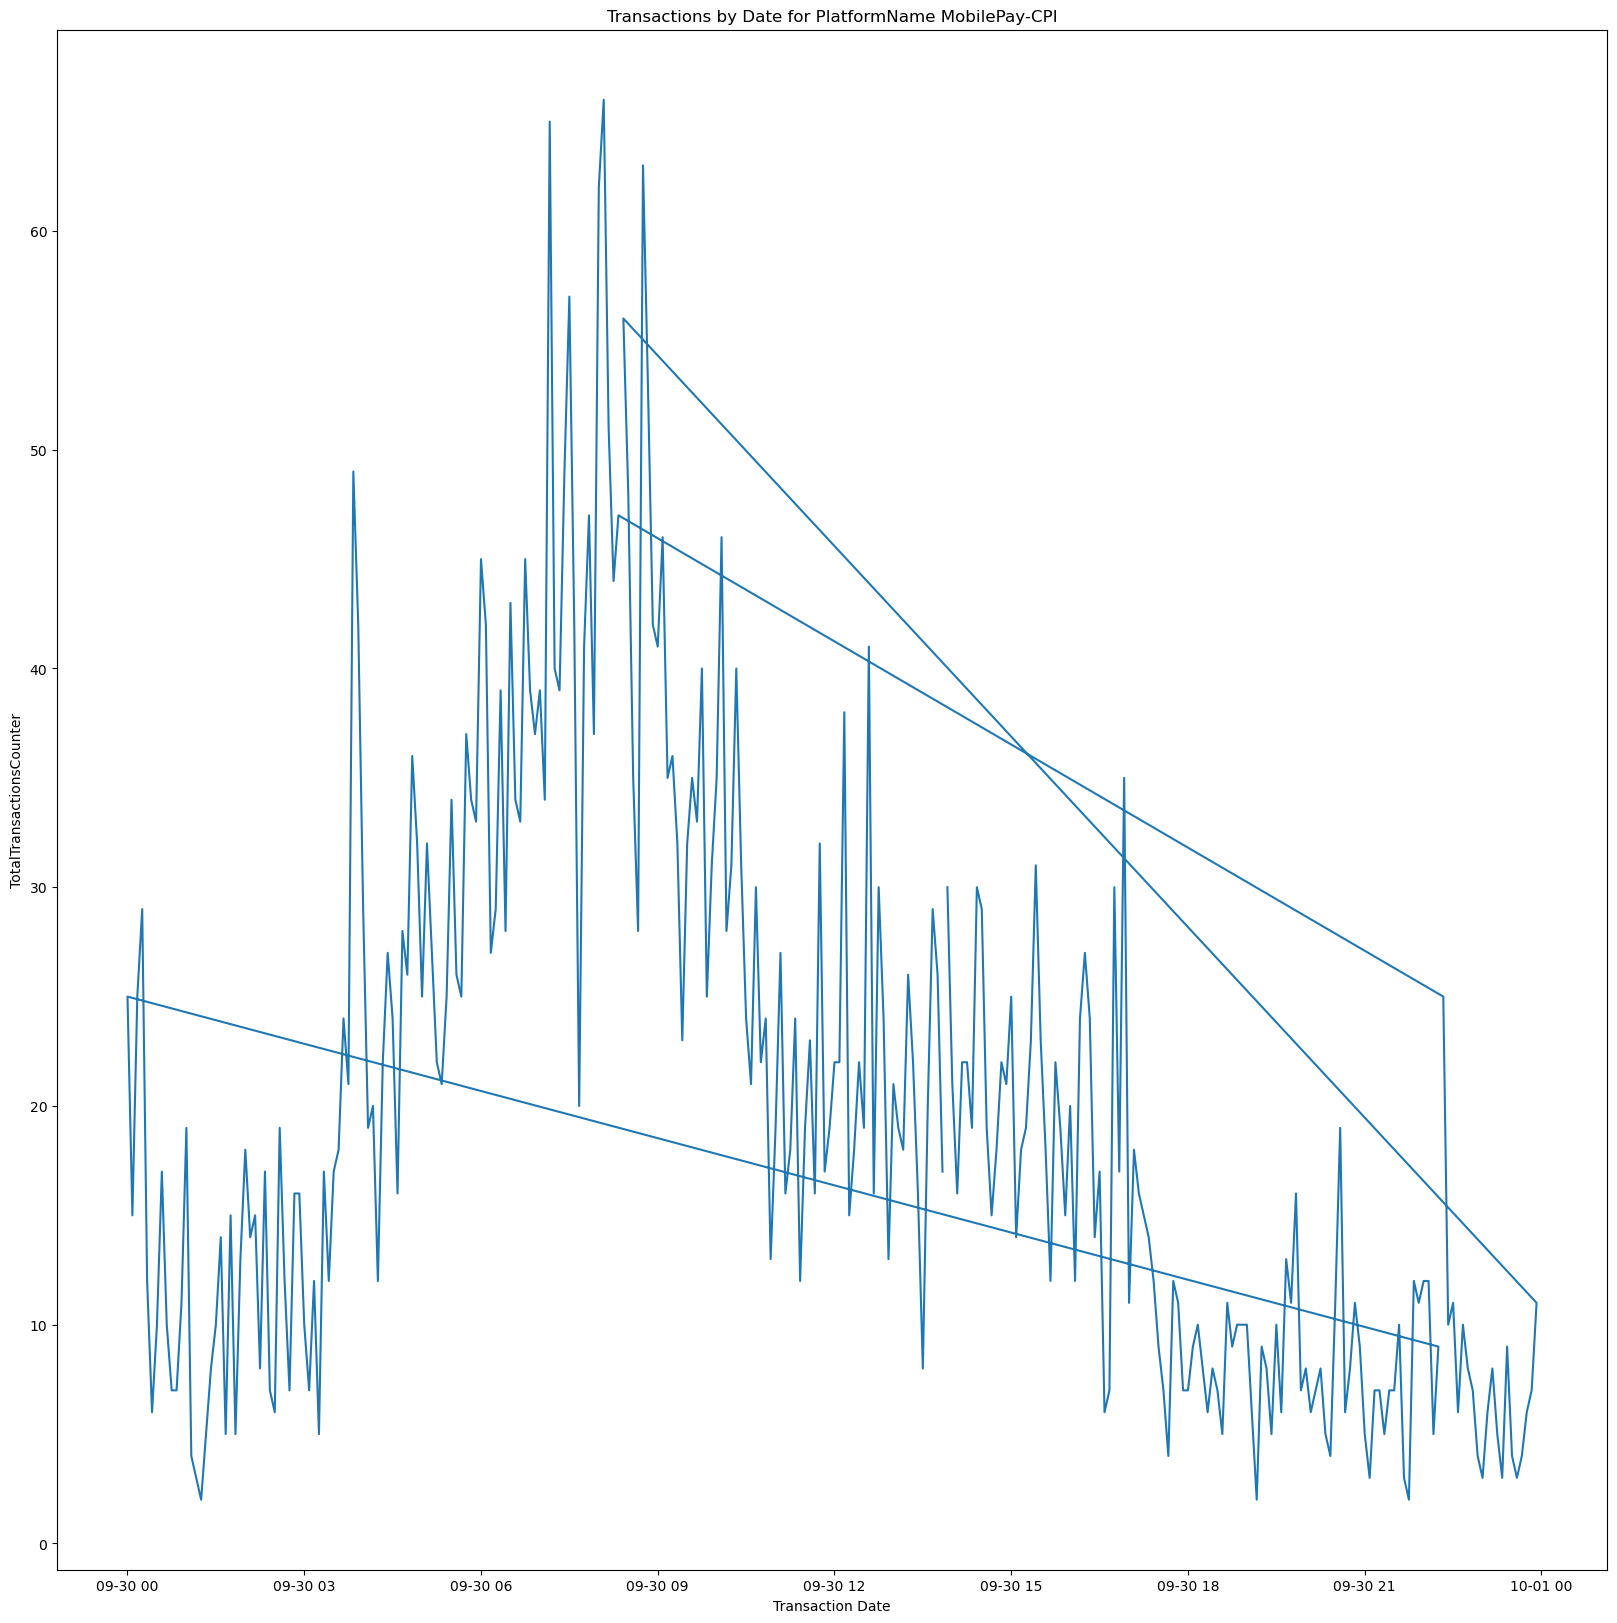

In [165]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePay-CPI')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [166]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Pickio'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,264024,2023-04-05 13:50:00,8,Pickio,0,0
1,264032,2023-04-05 13:55:00,8,Pickio,0,0
2,264040,2023-04-05 14:00:00,8,Pickio,0,0
3,264048,2023-04-05 14:05:00,8,Pickio,0,0
4,264056,2023-04-05 14:10:00,8,Pickio,0,0
...,...,...,...,...,...,...
52093,690760,2023-10-03 10:55:00,8,Pickio,0,0
52094,690768,2023-10-03 11:00:00,8,Pickio,0,0
52095,690776,2023-10-03 11:05:00,8,Pickio,0,0
52096,690784,2023-10-03 11:10:00,8,Pickio,0,0


In [167]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Pickio' AND Month(ReferenceDate)=09 and year(referencedate)= 2023
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,608856,2023-09-02 05:50:00,8,Pickio,0,0
1,608864,2023-09-02 05:55:00,8,Pickio,0,0
2,608872,2023-09-02 06:00:00,8,Pickio,0,0
3,608880,2023-09-02 06:05:00,8,Pickio,0,0
4,608888,2023-09-02 06:10:00,8,Pickio,0,0
...,...,...,...,...,...,...
8635,655048,2023-09-17 22:55:00,8,Pickio,0,0
8636,655056,2023-09-17 23:00:00,8,Pickio,0,0
8637,655064,2023-09-17 23:05:00,8,Pickio,0,0
8638,655072,2023-09-17 23:10:00,8,Pickio,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

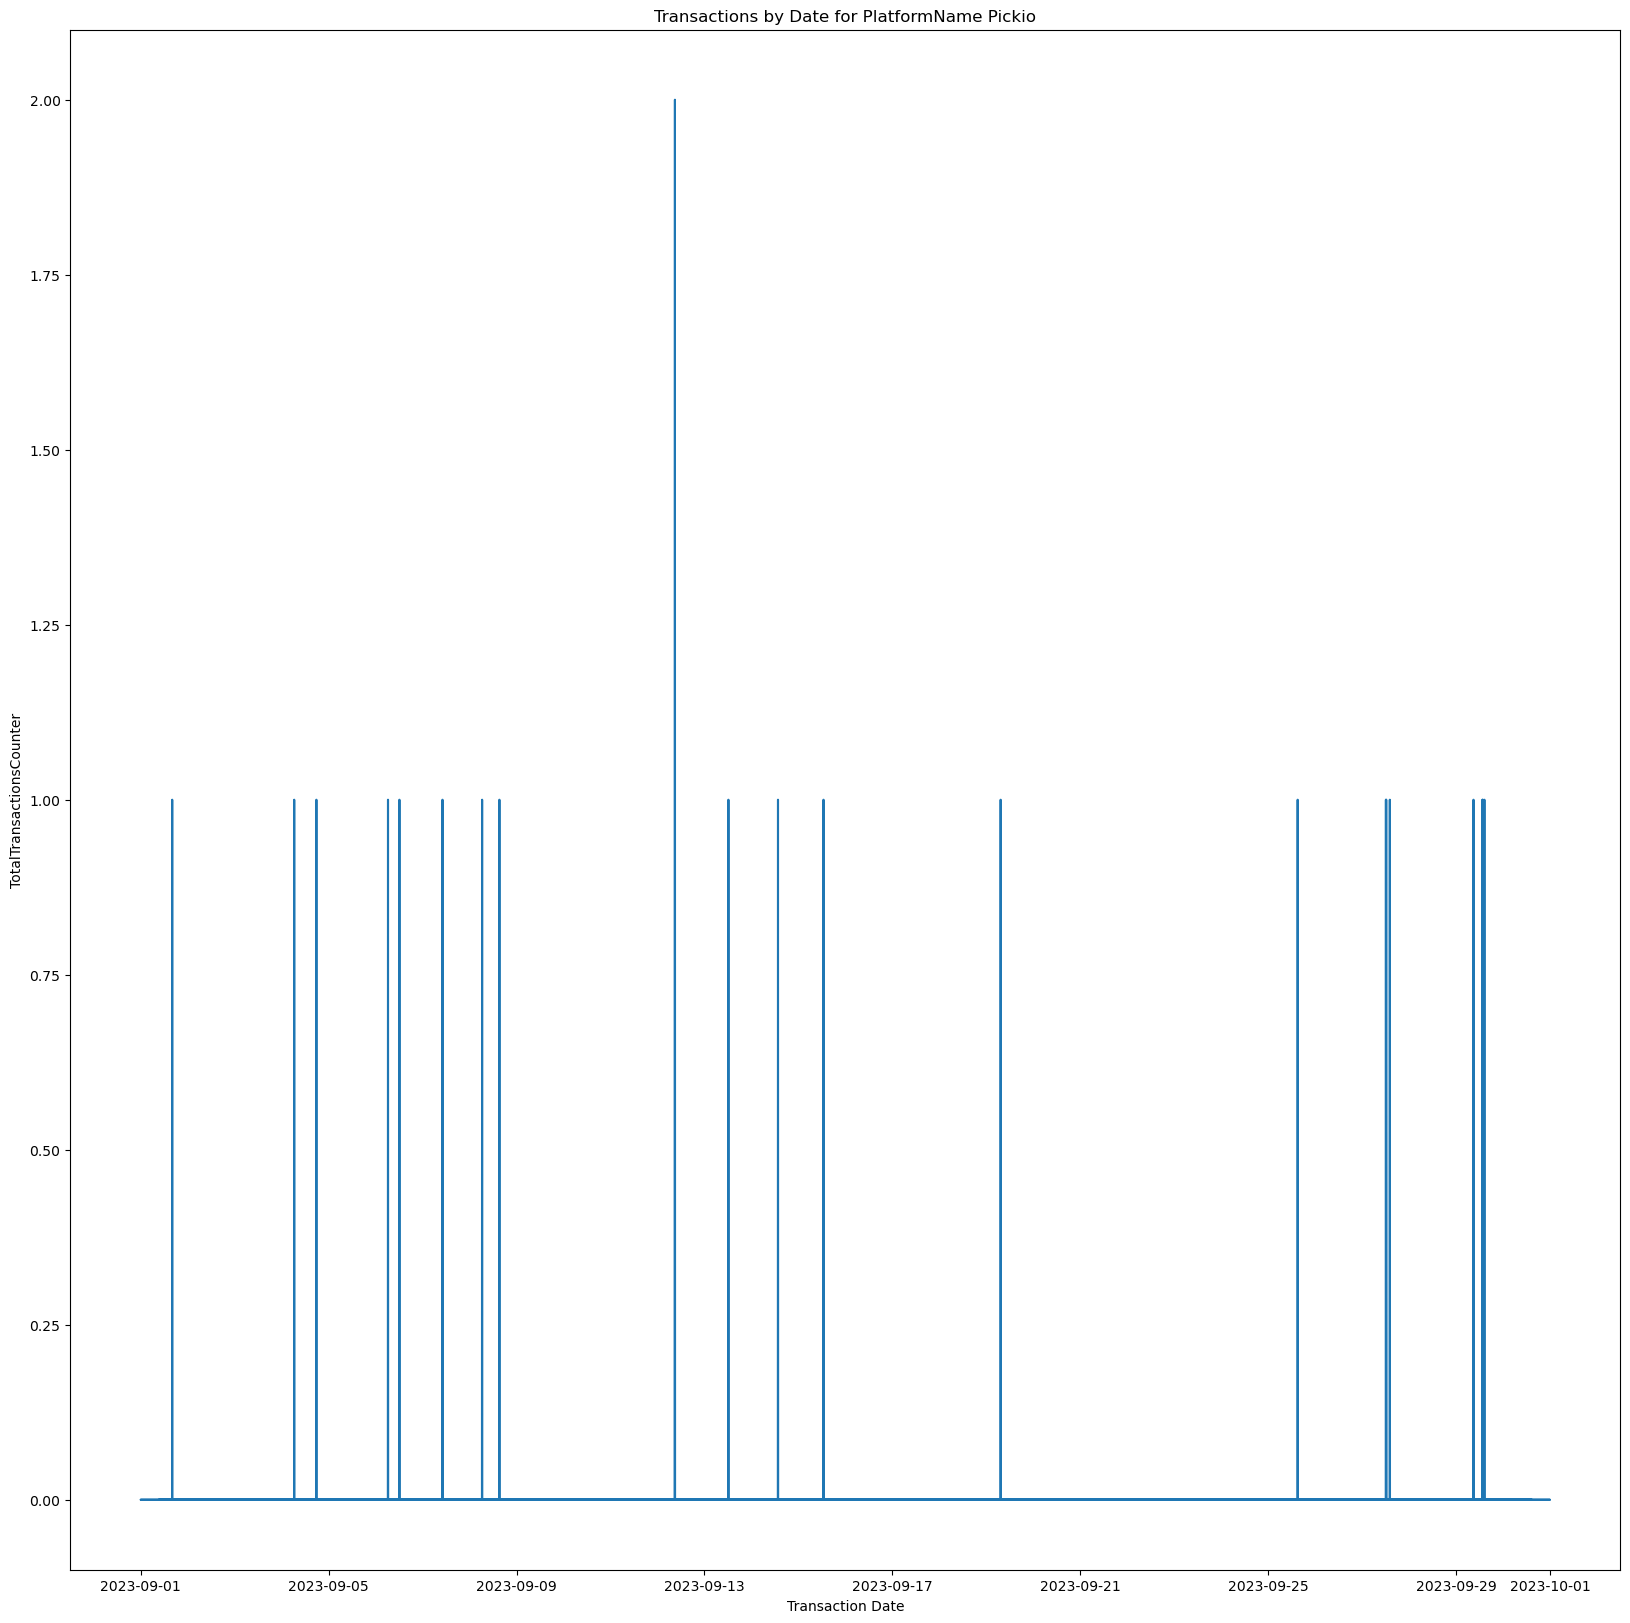

In [168]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName Pickio')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [169]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayFrance'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,5,2022-11-30 13:45:00,5,MobilePayFrance,0,0
1,12,2022-11-30 13:50:00,5,MobilePayFrance,0,0
2,19,2022-11-30 13:55:00,5,MobilePayFrance,0,0
3,26,2022-11-30 14:00:00,5,MobilePayFrance,0,0
4,33,2022-11-30 14:05:00,5,MobilePayFrance,0,0
...,...,...,...,...,...,...
88382,690757,2023-10-03 10:55:00,5,MobilePayFrance,0,0
88383,690765,2023-10-03 11:00:00,5,MobilePayFrance,0,0
88384,690773,2023-10-03 11:05:00,5,MobilePayFrance,0,0
88385,690781,2023-10-03 11:10:00,5,MobilePayFrance,0,0


In [170]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayFrance' AND Month(ReferenceDate)=09 and year(referencedate)= 2023
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,608861,2023-09-02 05:55:00,5,MobilePayFrance,0,0
1,608869,2023-09-02 06:00:00,5,MobilePayFrance,0,0
2,608877,2023-09-02 06:05:00,5,MobilePayFrance,0,0
3,608885,2023-09-02 06:10:00,5,MobilePayFrance,0,0
4,608893,2023-09-02 06:15:00,5,MobilePayFrance,0,0
...,...,...,...,...,...,...
8635,639813,2023-09-11 08:15:00,5,MobilePayFrance,0,0
8636,639821,2023-09-11 08:20:00,5,MobilePayFrance,0,0
8637,639829,2023-09-11 08:25:00,5,MobilePayFrance,0,0
8638,639837,2023-09-11 08:30:00,5,MobilePayFrance,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

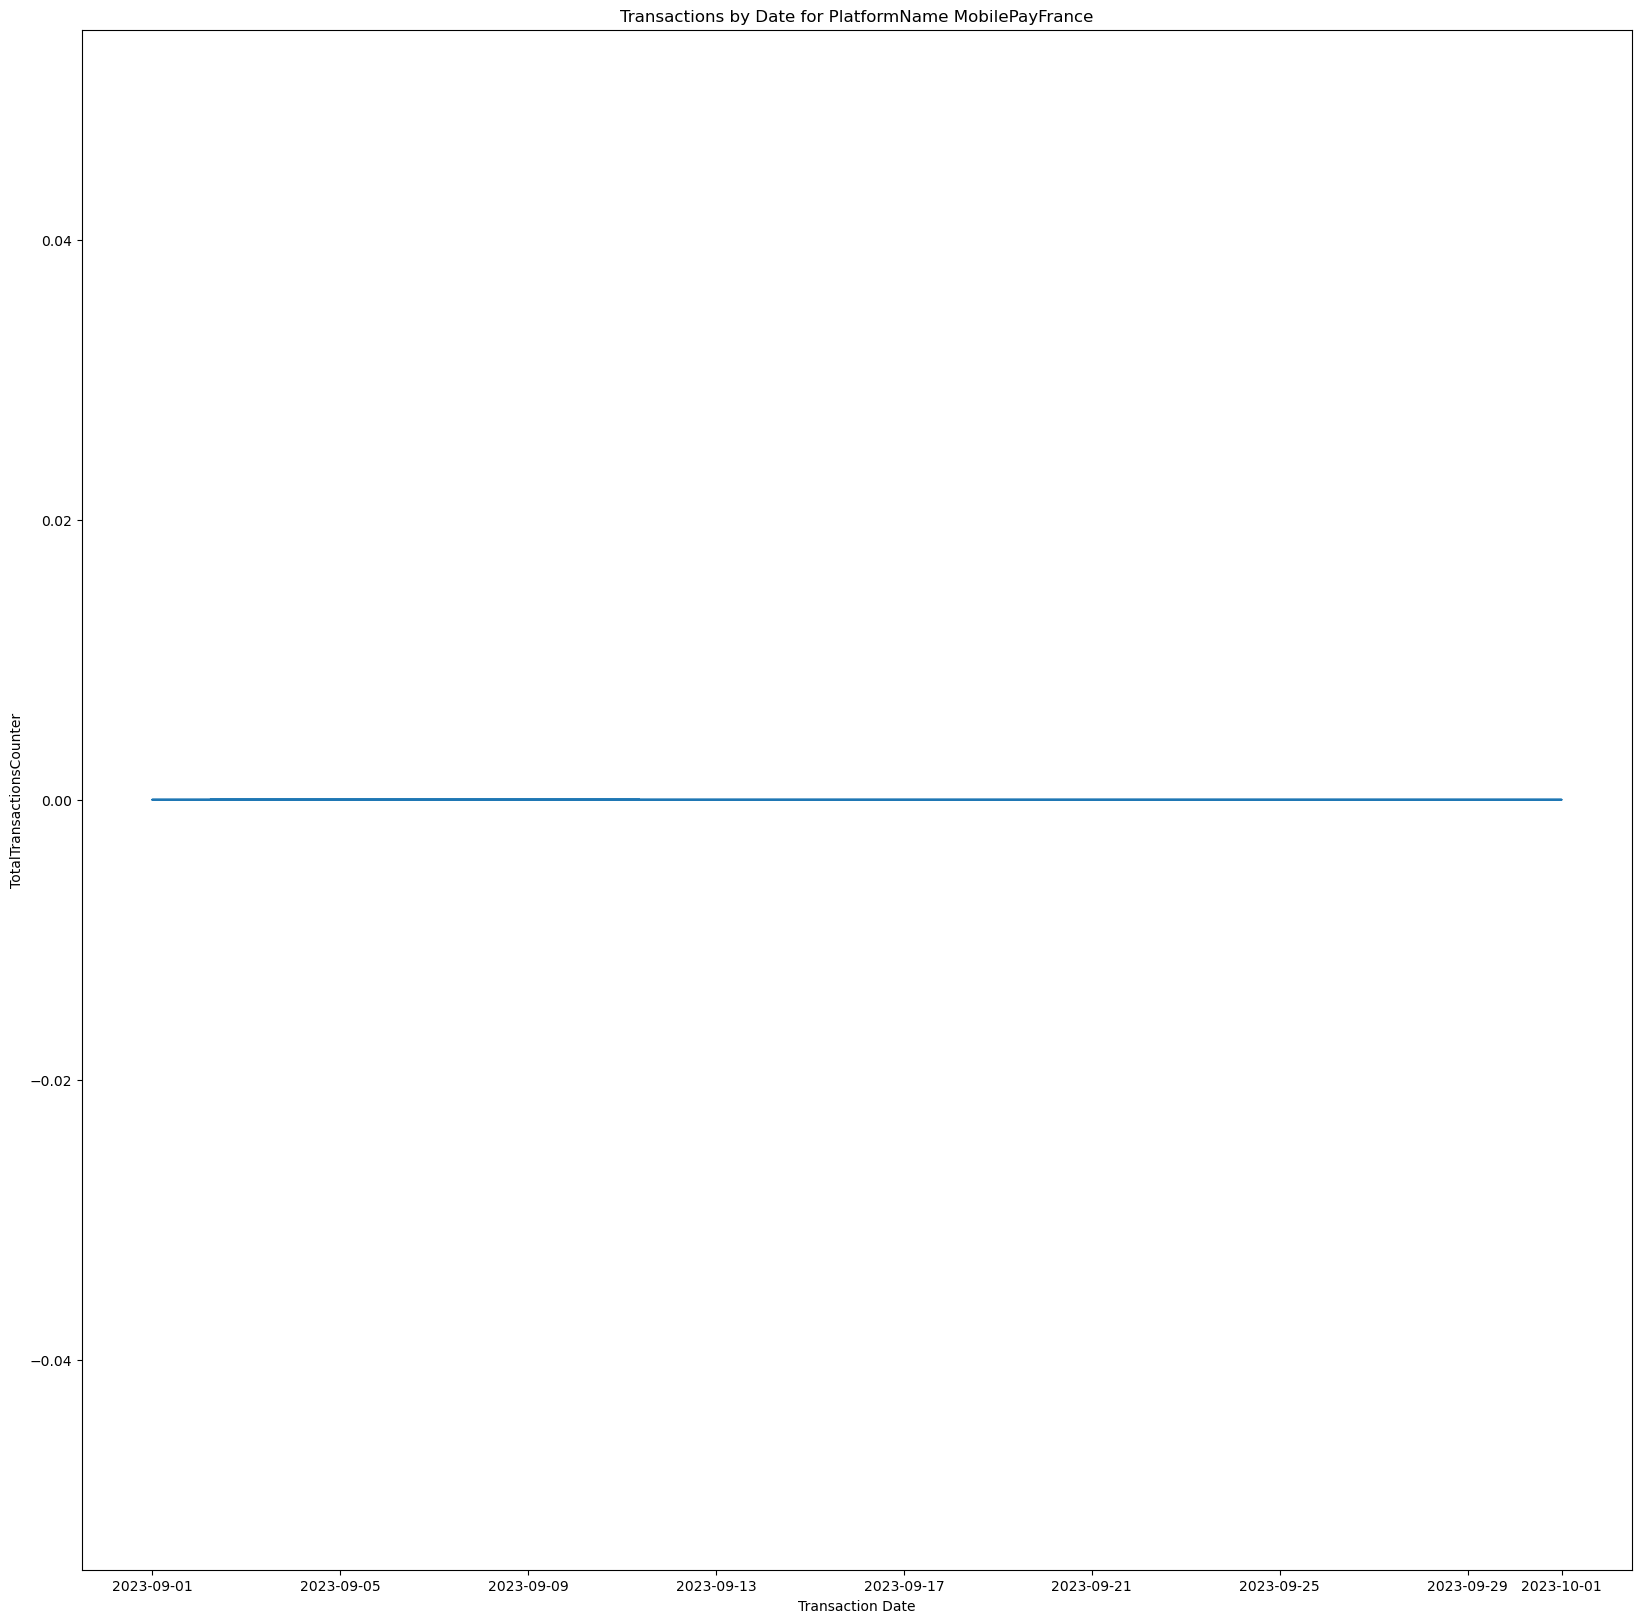

In [171]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePayFrance')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [172]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Coges'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,7,2022-11-30 13:45:00,7,Coges,81,58
1,14,2022-11-30 13:50:00,7,Coges,74,61
2,21,2022-11-30 13:55:00,7,Coges,49,38
3,28,2022-11-30 14:00:00,7,Coges,70,57
4,35,2022-11-30 14:05:00,7,Coges,65,59
...,...,...,...,...,...,...
88382,690759,2023-10-03 10:55:00,7,Coges,170,164
88383,690767,2023-10-03 11:00:00,7,Coges,193,171
88384,690775,2023-10-03 11:05:00,7,Coges,179,157
88385,690783,2023-10-03 11:10:00,7,Coges,203,166


In [173]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Coges' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684127,2023-09-30 13:50:00,7,Coges,43,41
1,684135,2023-09-30 13:55:00,7,Coges,35,33
2,684143,2023-09-30 14:00:00,7,Coges,27,25
3,684151,2023-09-30 14:05:00,7,Coges,30,25
4,684159,2023-09-30 14:10:00,7,Coges,27,22
...,...,...,...,...,...,...
283,684087,2023-09-30 13:25:00,7,Coges,28,28
284,684095,2023-09-30 13:30:00,7,Coges,13,12
285,684103,2023-09-30 13:35:00,7,Coges,49,38
286,684111,2023-09-30 13:40:00,7,Coges,21,12


Text(0, 0.5, 'TotalTransactionsCounter')

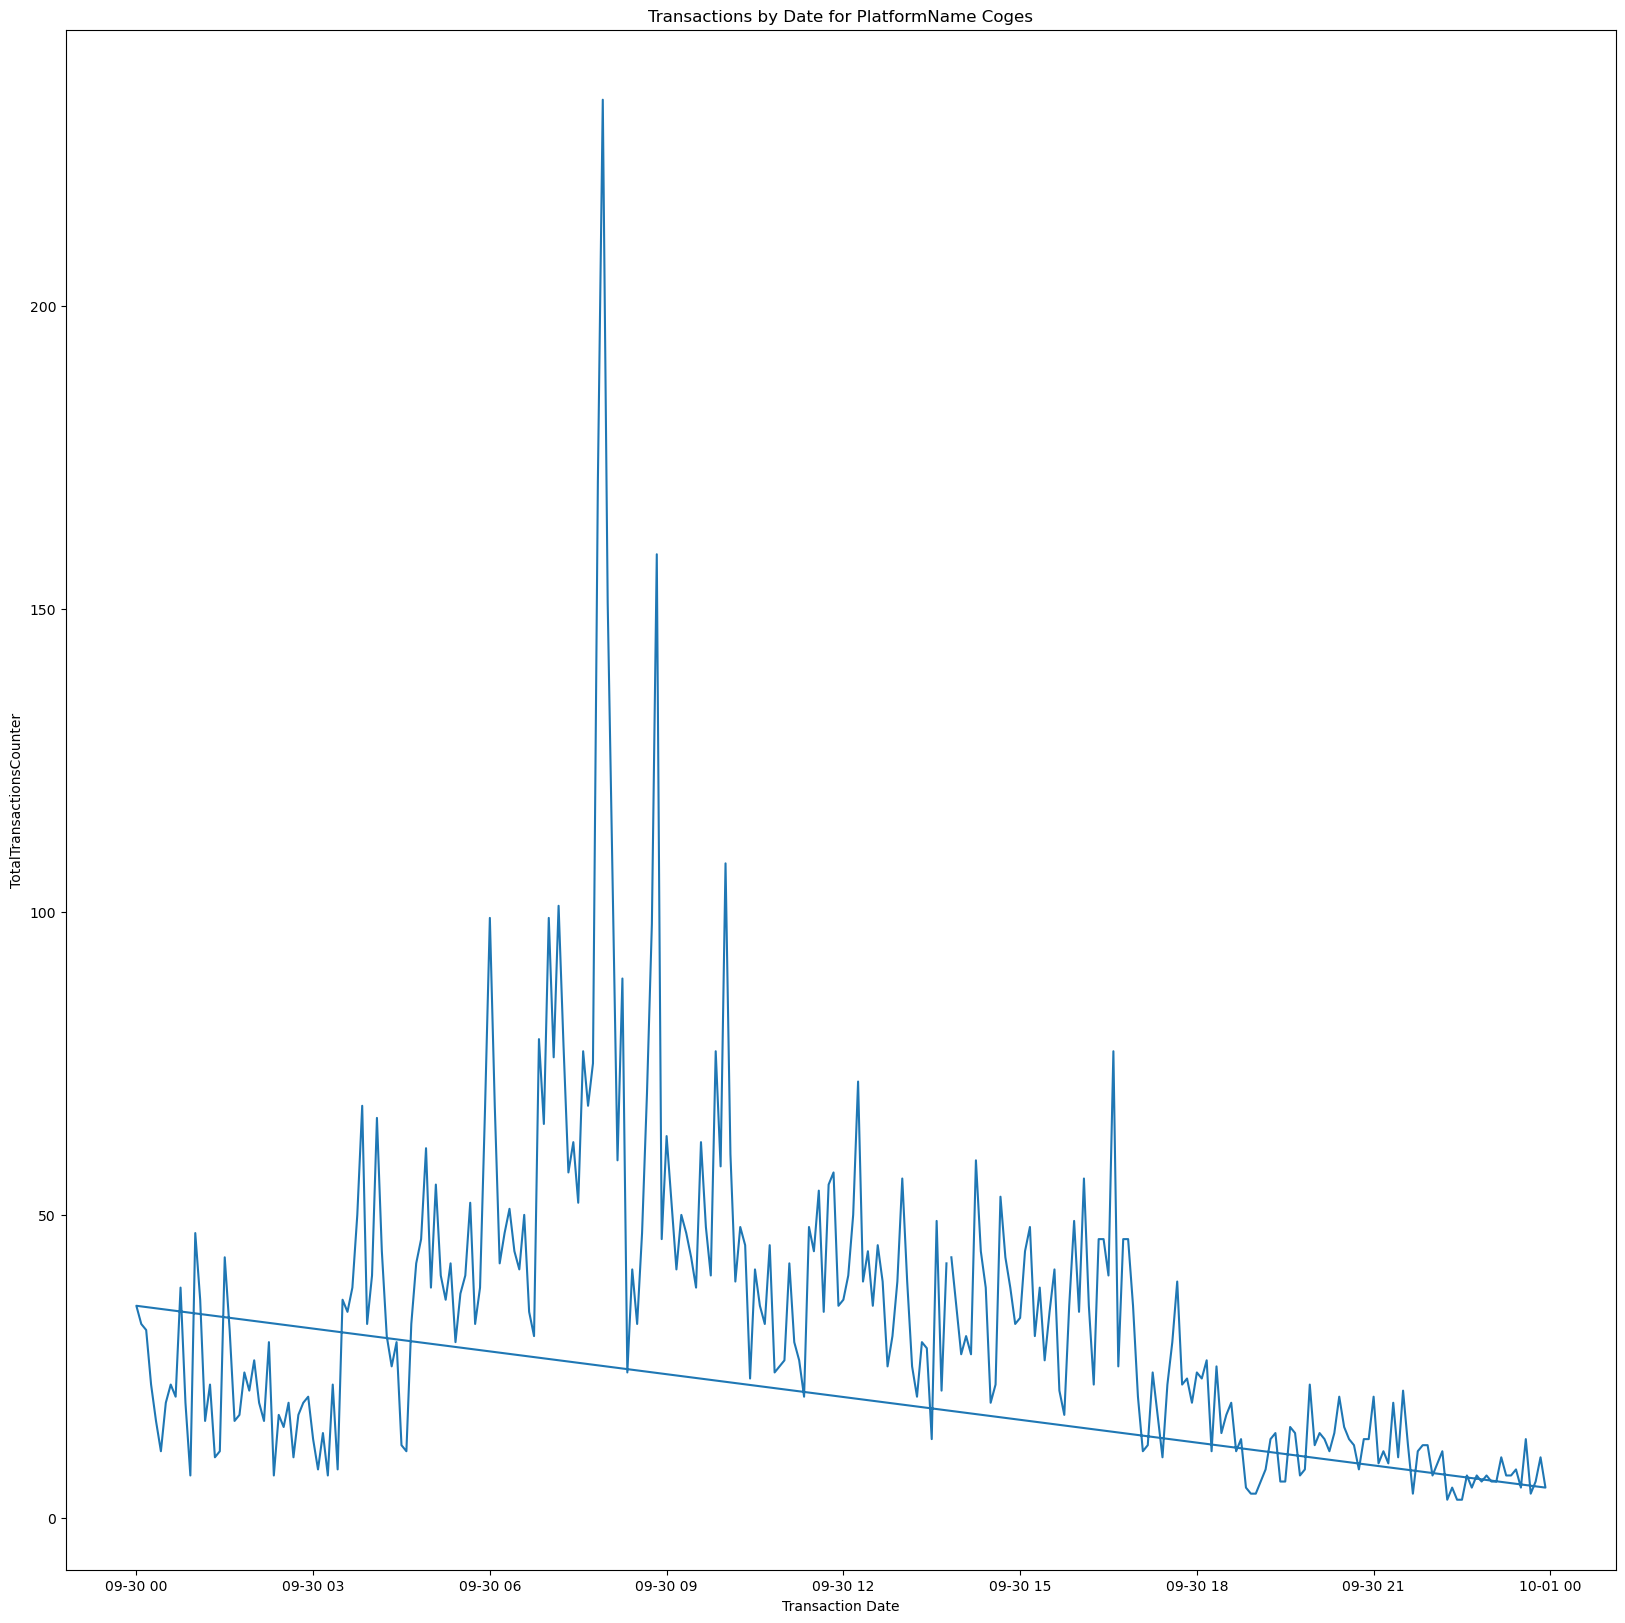

In [174]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName Coges')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')